# 삼성전자 주식 예측
https://youtu.be/sG_WeGbZ9A4
<br>
https://finance.yahoo.com/quote/005930.KS?p=005930.KS&.tsrc=fin-srch
<br>
https://github.com/kairess/stock_crypto_price_prediction
<br>
최근 5년간의 데이터


## LSTM
- 이전 데이터를 가지고 이후의 데이터를 예측하는 인공지능 모델 
- ex) 최근 50일간의 주식 가격 데이터를 바탕으로 내일 주식 가격은 얼마가 될 것인가?
- 인공지능이 기억력을 가지고 예측할 수 있다는 것이 장점
- 주식가격, 이더리움 가격 예측 가능

## 사용할 패키지
- pandas : csv파일 업로드
- numpy : 행렬 연산
- matplotlib.pyplot : 데이터 시각화
- keras : 딥러닝 모델 작성


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

## Load Dataset

In [2]:
# csv파일 로드
data = pd.read_csv('005930.KS.csv')
data = data.dropna()
# 데이터프레임 맨 앞의 5개 데이터 로드
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-09,31480.0,31580.0,31140.0,31340.0,27029.847656,9023200.0
1,2016-08-10,31340.0,31400.0,30680.0,30820.0,26581.367188,12340350.0
2,2016-08-11,30820.0,31180.0,30520.0,31180.0,26891.855469,10533600.0
3,2016-08-12,31180.0,31400.0,30880.0,30900.0,26650.367188,10474850.0
4,2016-08-16,30900.0,31520.0,30900.0,31360.0,27047.103516,10843100.0


## Compute Mid Price

In [3]:
# 최고가와 최저가의 중간가격인 mid price 예측
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

## Create Windows

<img src="https://user-images.githubusercontent.com/72501562/128666892-e82ed85c-7395-4e5c-8ac5-289e9f181298.png" width="50%">

- 총 51개의 데이터가 들어있는 window 생성
- 초록색의 50개 데이터를 보고 주황색 1개 데이터 예측

<img src="https://user-images.githubusercontent.com/72501562/128667045-33505771-a15b-4c2d-ab4f-c8258489e6fe.png" width="50%">
                                                                                                                        
- 그 다음 window는 한칸씩 밀려나면서 만들어짐

In [4]:
# lstm의 기본 개념 : 최근 50일간의 데이터를 보고 내일 것을 예측한다
seq_len = 50  #window size : 최근 며칠을 볼 것이냐 
sequence_length = seq_len + 1  #window 한개에 51개의 데이터를 저장

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index+sequence_length])

## Normalize Data

In [5]:
normalized_data = []
# 정규화 : 각 window의 첫번째 값을 0으로 만들어주고 그것을 0으로 봤을 때의 비율들
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
# training set 90%, test set 10%
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train) # 배열의 값을 랜덤으로 섞는다

# training set
x_train = train[:, :-1]  # window의 앞부분 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]  # window의 마지막 1개

# test set
x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]  

x_train.shape, x_test.shape
# 1055일의 데이터를 가지고 학습해서 117일의 주식 가격을 예측하겠다는 의미

((1055, 50, 1), (117, 50, 1))

## Build a Model

In [6]:
# 모델을 순차적으로 정의하는 클래스
model = Sequential()
# LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

# Output(Dense) : 1개 
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


## Training

In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# validation loss가 작을수록 학습이 잘 되는 것

Epoch 1/20
106/106 [==============================] - 20s 105ms/step - loss: 0.0040 - val_loss: 2.1804e-04
Epoch 2/20
106/106 [==============================] - 6s 61ms/step - loss: 0.0011 - val_loss: 1.8035e-04
Epoch 3/20
106/106 [==============================] - 6s 59ms/step - loss: 7.8544e-04 - val_loss: 3.7908e-04
Epoch 4/20
106/106 [==============================] - 6s 61ms/step - loss: 7.0002e-04 - val_loss: 1.1596e-04
Epoch 5/20
106/106 [==============================] - 6s 61ms/step - loss: 5.2862e-04 - val_loss: 1.9099e-04
Epoch 6/20
106/106 [==============================] - 6s 60ms/step - loss: 3.5870e-04 - val_loss: 2.0593e-04
Epoch 7/20
106/106 [==============================] - 6s 58ms/step - loss: 3.3035e-04 - val_loss: 2.0602e-04
Epoch 8/20
106/106 [==============================] - 6s 54ms/step - loss: 4.0461e-04 - val_loss: 2.0616e-04
Epoch 9/20
106/106 [==============================] - 6s 60ms/step - loss: 3.3083e-04 - val_loss: 3.9752e-04
Epoch 10/20
106/106 [====

## Prediction

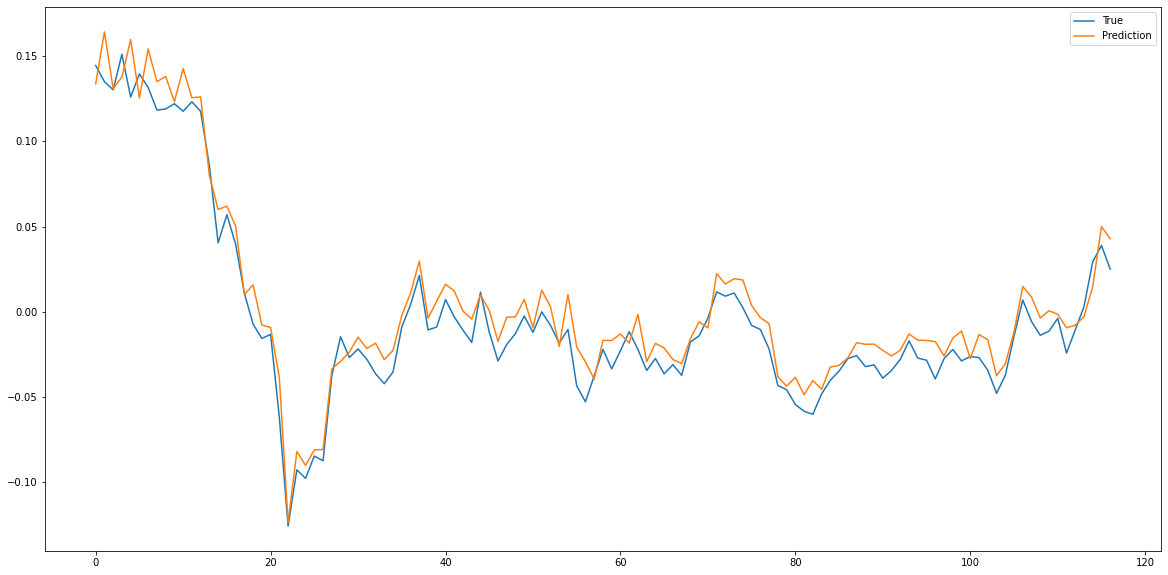

In [8]:
# 모델이 잘 학습되었는지 검증하고 그래프 그리기 

pred = model.predict(x_test)  # 모델을 사용하여 예측한다

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()